In [1]:
import os
import pandas as pd
os.chdir(r"C:\Users\user\jupyter\python\preprocessing\데이터")

In [2]:
df = pd.read_csv("판매실적통합본.csv", engine = "python")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [3]:
# 제품군별 수량합계 계산
grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [20]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

<BarContainer object of 6 artists>

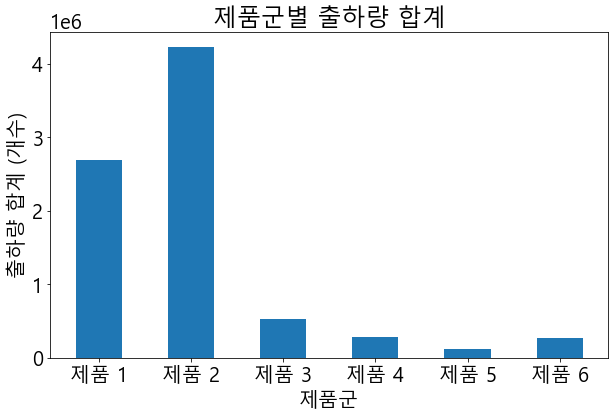

In [22]:
# 제품군별 출하량 합계 계산
plt.title("제품군별 출하량 합계")
plt.xlabel("제품군")
plt.ylabel("출하량 합계 (개수)")
plt.bar(grouped_df1['제품군'], grouped_df1['수량'], width = .5)

#### 다중 bar chart 그리기

In [23]:
plt.rcParams["figure.figsize"] = (40, 15)
grouped_df2 = df.groupby(['년도(year)', '제품군'], as_index = True)['수량'].sum()
print(grouped_df2)  # multi index 
# 계층을 풀어준다
# 제품별, 연도별 그래프 그리기

년도(year)  제품군 
2016      제품 1     637130
          제품 2    1029868
          제품 3     134693
          제품 4      56774
          제품 5      30142
          제품 6      41612
2017      제품 1     763450
          제품 2    1215031
          제품 3     154208
          제품 4      82124
          제품 5      36363
          제품 6      64722
2018      제품 1     807846
          제품 2    1307538
          제품 3     157031
          제품 4      83692
          제품 5      39851
          제품 6      85157
2019      제품 1     481881
          제품 2     670947
          제품 3      86014
          제품 4      54603
          제품 5      19967
          제품 6      71283
Name: 수량, dtype: int64


제품군,제품 1,제품 2,제품 3,제품 4,제품 5,제품 6
년도(year),,,,,,
2016,637130,1029868,134693,56774,30142,41612
2017,763450,1215031,154208,82124,36363,64722
2018,807846,1307538,157031,83692,39851,85157
2019,481881,670947,86014,54603,19967,71283


<AxesSubplot:xlabel='년도(year)'>

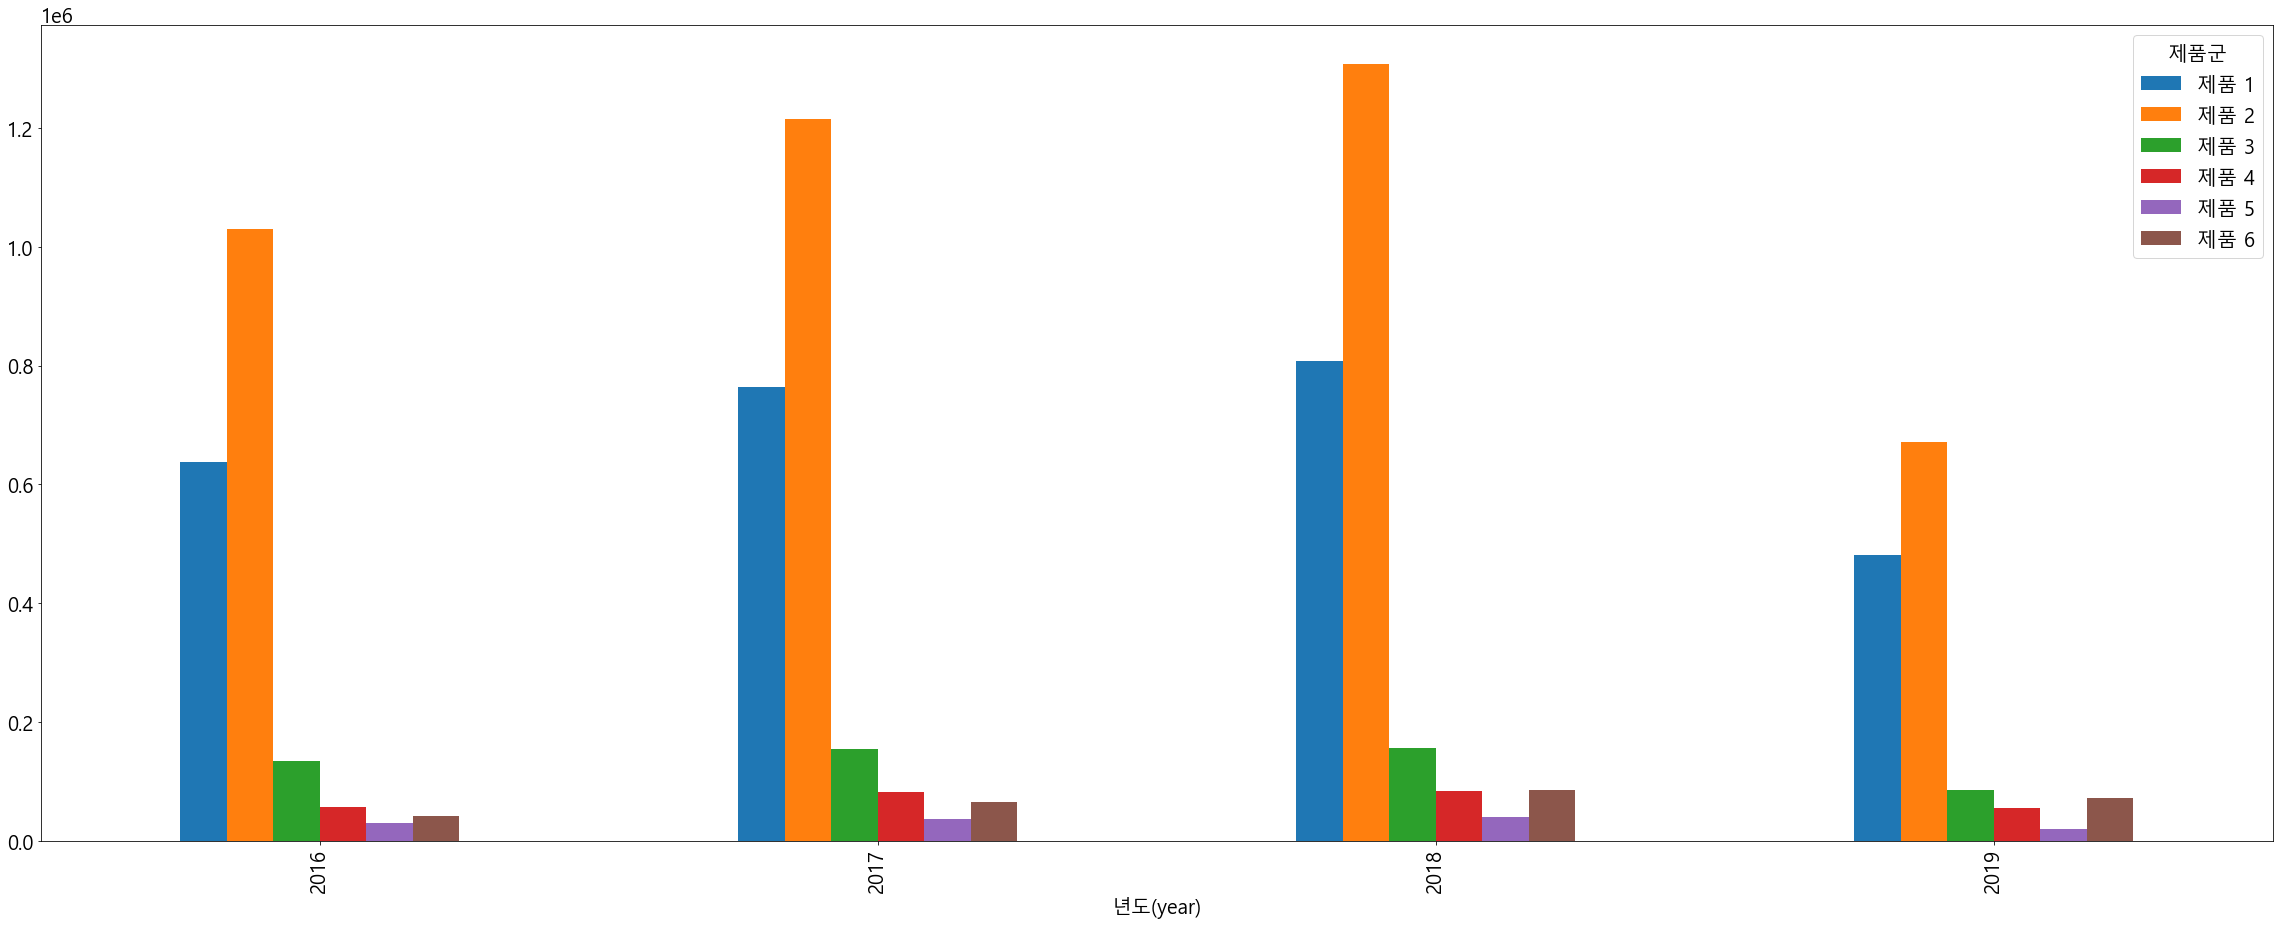

In [13]:
grouped_df2.unstack().plot(kind = 'bar')

In [48]:
grouped_df2.unstack().columns

Index(['제품 1', '제품 2', '제품 3', '제품 4', '제품 5', '제품 6'], dtype='object', name='제품군')

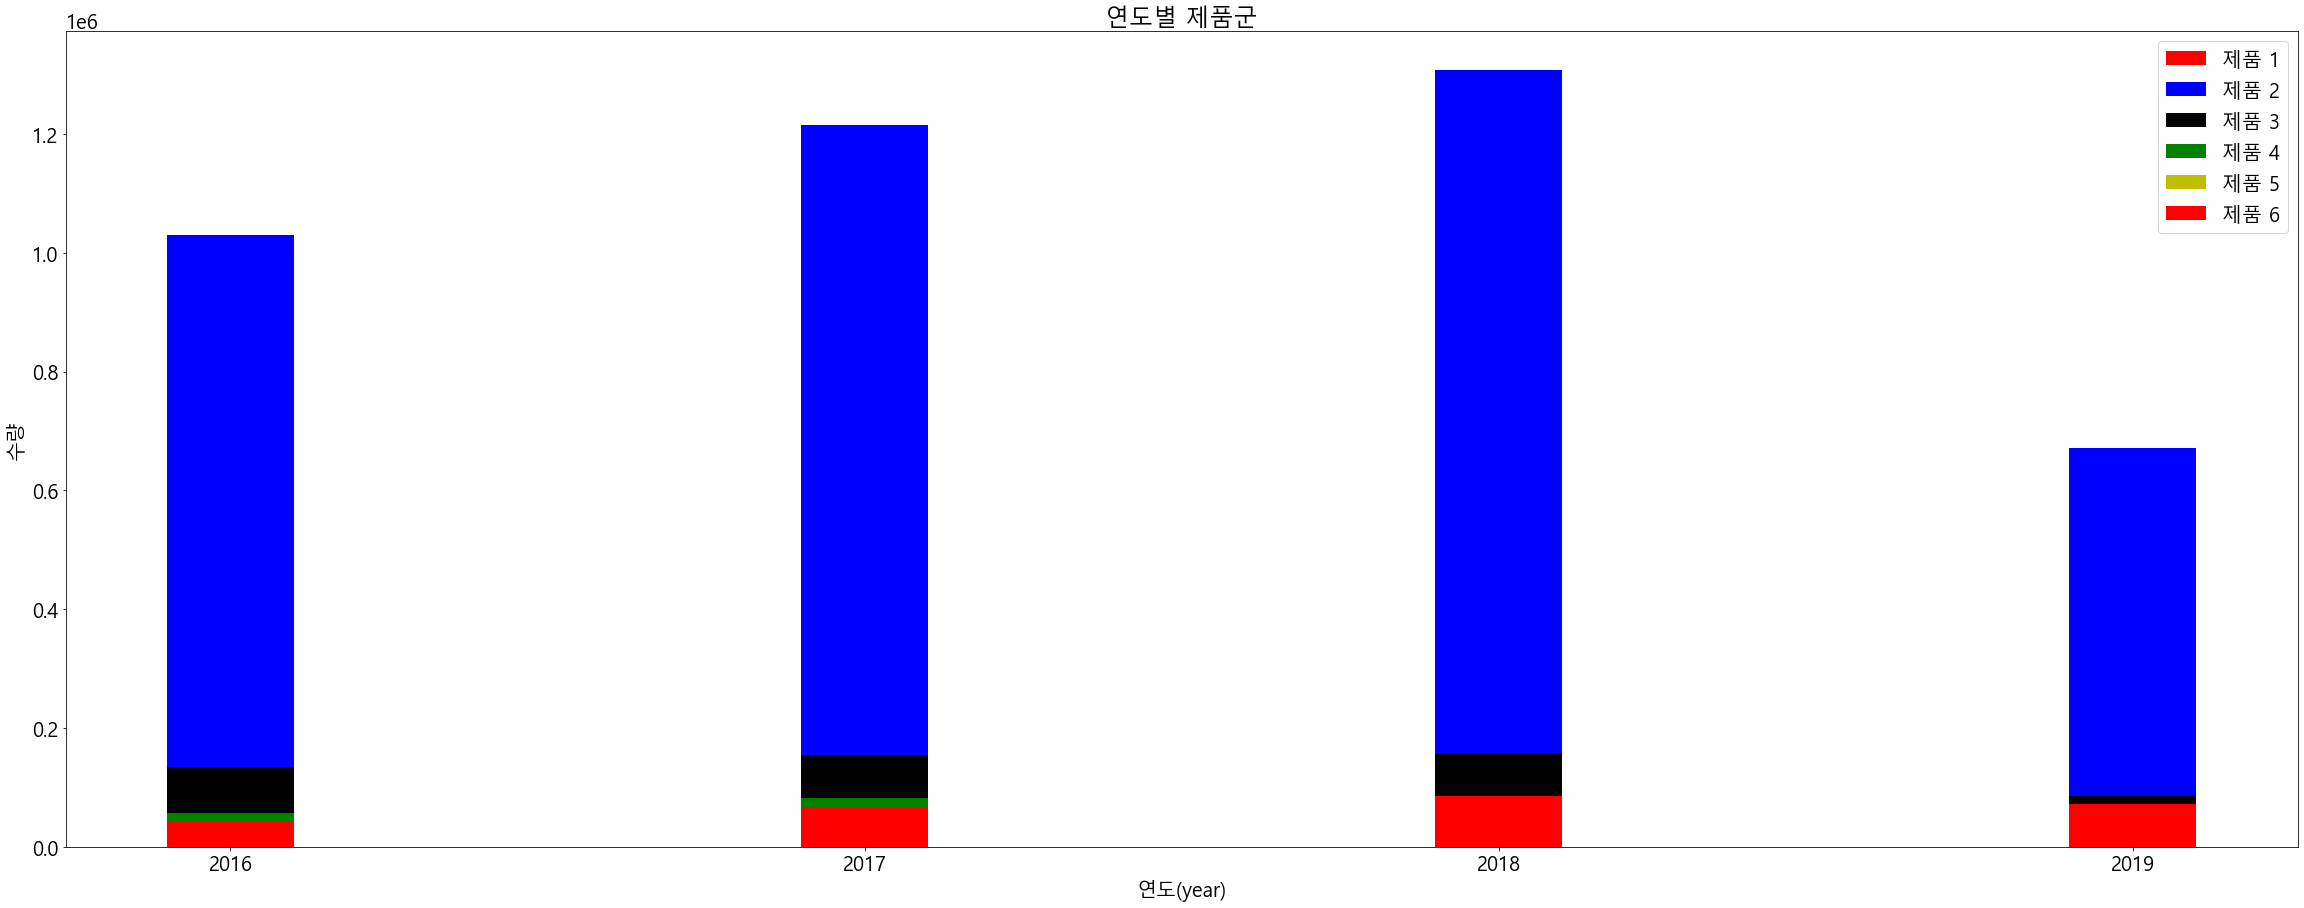

In [50]:
plt.title('연도별 제품군')
plt.xlabel('연도(year)')
plt.ylabel('수량')

plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,0], color = 'r', label = '제품 1', width = .2)
plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,1], color = 'b', label = '제품 2', width = .2)
plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,2], color = 'k', label = '제품 3', width = .2)
plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,3], color = 'g', label = '제품 4', width = .2)
plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,4], color = 'y', label = '제품 5', width = .2)
plt.bar(['2016', '2017', '2018', '2019'] ,grouped_df2.unstack().iloc[:,5], color = 'r', label = '제품 6', width = .2)
plt.legend()